<a href="https://colab.research.google.com/github/baldpanda/dog_breed_classifier/blob/running-cnn-on-kaggle-test/dog_breed_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Classification

Playing with TensorFlow and Neural Networks to build a classifier to predict the breed given an image of a dog. The source of the dataset was Kaggle and the competition related to this task can be found [here](https://www.kaggle.com/c/dog-breed-identification). Storing the training data on Google Drive for easy integration with colab. Using Colab to take advantage of the compute power and I'm not sure my current laptop could cope with this task.

In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
import random
print(tf.VERSION)

1.13.1


In [0]:
DRIVE_BASE_PATH = '/content/drive/My Drive/'
LABELS_PATH = DRIVE_BASE_PATH +  'dog_breed_classification/dog_breeds'
ST_BERNARD_SAMPLE_IMAGE_PATH = LABELS_PATH + '/saint_bernard/1b26fc0e227488f288c753c84a88ca6c.jpg'
MODEL_PATH = DRIVE_BASE_PATH + 'dog_breed_classification/model_test_one_epoch.h5'
TEST_DATA_PATH = DRIVE_BASE_PATH + 'dog_breed_classification/' + 'test/'

Loading in training data from Google Drive.

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Extracting the dog breed labels from Google Drive
dog_breeds = os.listdir(LABELS_PATH)

In [0]:
st_bernard_image = Image.open(ST_BERNARD_SAMPLE_IMAGE_PATH)

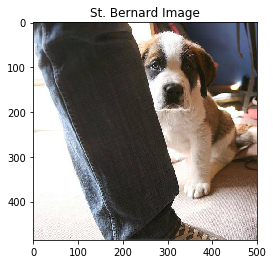

In [6]:
plt.imshow(st_bernard_image)
plt.title("St. Bernard Image")
plt.show()

## Baseline model

A baseline model could be to research the most common dog breed and always predict that breed. 

Based from some brief research the most common dog breed is a Labrador Retriever.

In [7]:
print("The accuracy of the baseline model on the training data is {0:.2f}%.".format(100 * len(os.listdir(LABELS_PATH + "/labrador_retriever"))/10222))

The accuracy of the baseline model on the training data is 0.82%.


## Training basic CNN using Keras

Using  Keras's ImageDataGenerator to label the images of dogs for training a CNN

In [0]:
train_data_generator = ImageDataGenerator(rescale = 1/255)

In [9]:
train_generator = train_data_generator.flow_from_directory(
    LABELS_PATH,
    target_size=(300,300),
    batch_size=269,
    class_mode='sparse'
)

Found 10222 images belonging to 120 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model = tf.keras.models.load_model("/content/drive/My Drive/dog_breed_classification/model_test_three_epochs.h5")

## Testing model on training image of St. Bernard shown previously

In [0]:
# reshaping and normalizing image to same format as training data
st_bernard_image_scaled = st_bernard_image.resize((300,300), Image.NEAREST)
np_st_bernard = np.array(st_bernard_image_scaled)
np_st_bernard = np_st_bernard / 255.0
np_st_bernard = np_st_bernard.reshape(1, 300, 300, 3)

In [14]:
predicted_breed = model.predict(np_st_bernard).argmax(axis=-1)[0]
dog_breeds[predicted_breed]

'samoyed'

## Creating a function to take image from training data at random and run model to make prediction

In [15]:
number_of_categories = len(dog_breeds)
print("The number of different breeds in the training data are {}.".format(number_of_categories))

The number of different breeds in the training data are 120.


In [16]:
# Picking dog at random from training data
rand_picked_breed = dog_breeds[random.randint(1,number_of_categories)]
print("The breed picked at random is {}.".format(rand_picked_breed))

The breed picked at random is schipperke.


In [0]:
path_for_rand_breed = LABELS_PATH + "/" + rand_picked_breed
images_in_directory = os.listdir(path_for_rand_breed)
rand_picked_image = images_in_directory[random.randint(1, len(images_in_directory))]
rand_image_path = path_for_rand_breed + "/" + rand_picked_image
rand_picked_image = Image.open(rand_image_path)

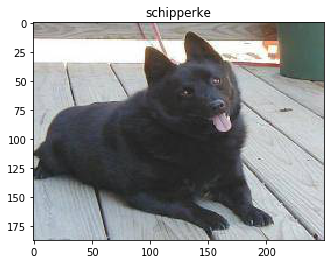

In [18]:
plt.imshow(rand_picked_image)
plt.title(rand_picked_breed)
plt.show()

In [0]:
rand_picked_image_scaled = rand_picked_image.resize((300, 300), Image.NEAREST)
np_rand_picked_image_scaled = np.array(rand_picked_image_scaled)
np_rand_picked_image_norm = np_rand_picked_image_scaled / 255.0
np_rand_picked_image_norm = np_rand_picked_image_norm.reshape(1, 300, 300, 3)

In [20]:
predicted_breed = dog_breeds[model.predict(np_rand_picked_image_norm).argmax(axis=-1)[0]]
print("Predicted breed of dog is {}, and the actual breed is {}.".format(predicted_breed, rand_picked_breed))

Predicted breed of dog is great_pyrenees, and the actual breed is schipperke.


Making functions to format image and to predict its breed

In [0]:
def format_image_for_model(image):
  image_scaled = image.resize((300, 300), Image.NEAREST)
  image_scaled_array = np.array(image_scaled)
  image_scaled_array_norm = image_scaled_array / 255.0
  image_scaled_array_norm = image_scaled_array_norm.reshape(1, 300, 300, 3)
  return image_scaled_array_norm

In [0]:
def predict_breed(model, image, labels):
  formatted_image = format_image_for_model(image)
  model_prediction = model.predict(formatted_image).argmax(axis=-1)[0]
  predicted_breed = labels[model_prediction]
  return predicted_breed

In [23]:
predict_breed(model, rand_picked_image, dog_breeds)

'great_pyrenees'

## Training model for 3 epochs to try and improve accuracy

In [0]:
# history = model.fit_generator(train_generator, steps_per_epoch=38, epochs=3, verbose=2)

In [0]:
# model.save("/content/drive/My Drive/dog_breed_classification/model_test_three_epochs.h5")

In [26]:
predict_breed(model, rand_picked_image, dog_breeds)

'great_pyrenees'

## Testing how the model generalises on Kaggle test set

In [0]:
HEADER_TEST_FILE = ','.join(dog_breeds)
test_image_path = os.listdir(TEST_DATA_PATH)

In [0]:
number_of_test_images = len(test_image_path)

In [0]:
for image in test_image_path:
  image_full_path = TEST_DATA_PATH + image
  image_pix = Image.open(image_full_path)
  print(predict_breed(model, image_pix, dog_breeds))

standard_poodle
malamute
irish_wolfhound
walker_hound
affenpinscher
malamute
norfolk_terrier
greater_swiss_mountain_dog
saluki
malinois
miniature_pinscher
bloodhound
english_setter
whippet
leonberg
pomeranian
black-and-tan_coonhound
irish_wolfhound
affenpinscher
saint_bernard
irish_wolfhound
saluki
chow
redbone
borzoi
shetland_sheepdog
leonberg
affenpinscher
saluki
black-and-tan_coonhound
walker_hound
kuvasz
dhole
irish_wolfhound
saluki
newfoundland
soft-coated_wheaten_terrier
bedlington_terrier
redbone
bedlington_terrier
english_setter
bloodhound
leonberg
great_pyrenees
saluki
bedlington_terrier
malamute
bluetick
boston_bull
black-and-tan_coonhound
malamute
leonberg
entlebucher
pomeranian
bluetick
border_collie
saluki
affenpinscher
redbone
saluki
redbone
dhole
sealyham_terrier
border_collie
saint_bernard
collie
norwich_terrier
samoyed
border_collie
walker_hound
bernese_mountain_dog
clumber
scotch_terrier
gordon_setter
english_springer
rhodesian_ridgeback
appenzeller
basset
bedlington_

# Notes 

Machine interrupted whilst training. The first epoch took approx 3000 secs = 50 mins

=> The training would take 12.5 hours to train on standard machine. Having another go on a TPU enabled one (fingers crossed)

Also, on first epoch the model achieved an accuracy of just slightly better than guessing the same label (i.e. St. Bernard) for all the images